# Programming assignment 10: Dimensionality Reduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

%matplotlib inline

##  PCA Task

Given the data in the matrix X your tasks is to:
* Calculate the covariance matrix $\Sigma$.
* Calculate eigenvalues and eigenvectors of $\Sigma$.
* Plot the original data $X$ and the eigenvectors to a single diagram. What do you observe? Which eigenvector corresponds to the smallest eigenvalue?
* Determine the smallest eigenvalue and remove its corresponding eigenvector. The remaining eigenvector is the basis of a new subspace.
* Transform all vectors in X in this new subspace by expressing all vectors in X in this new basis.	

### The given data X

In [2]:
X = np.array([(-3,-2),(-2,-1),(-1,0),(0,1),
              (1,2),(2,3),(-2,-2),(-1,-1),
              (0,0),(1,1),(2,2), (-2,-3),
              (-1,-2),(0,-1),(1,0), (2,1),(3,2)])

### Task 1: Calculate the covariance matrix $\Sigma$

In [3]:
def get_covariance(X):
    """Calculates the covariance matrix of the input data.
    
    Parameters
    ----------
    X : array, shape [N, D]
        Data matrix.
        
    Returns
    -------
    Sigma : array, shape [D, D]
        Covariance matrix
        
    """
    # TODO
    # compute the mean
    Sigma = np.cov(X.T)
    return Sigma

### Task 2: Calculate eigenvalues and eigenvectors of  $\Sigma$.

In [4]:
def get_eigen(S):
    """Calculates the eigenvalues and eigenvectors of the input matrix.
    
    Parameters
    ----------
    S : array, shape [D, D]
        Square symmetric positive definite matrix.
        
    Returns
    -------
    L : array, shape [D]
        Eigenvalues of S
    U : array, shape [D, D]
        Eigenvectors of S
    
    """
    # TODO
    L, U = LA.eig(S)
    return L,U

### Task 3: Plot the original data X and the eigenvectors to a single diagram.

shape: (2, 2)


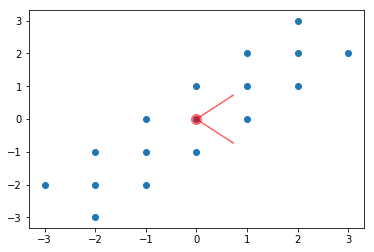

In [5]:
# plot the original data
plt.scatter(X[:, 0], X[:, 1])

# plot the mean of the data
mean_d1, mean_d2 = X.mean(0)
plt.plot(mean_d1, mean_d2, 'o', markersize=10, color='red', alpha=0.5)

# calculate the covariance matrix
Sigma = get_covariance(X)
# calculate the eigenvector and eigenvalues of Sigma
L, U = get_eigen(Sigma)

plt.arrow(mean_d1, mean_d2, U[0, 0], U[0, 1], width=0.01, color='red', alpha=0.5)
plt.arrow(mean_d1, mean_d2, U[1, 0], U[1, 1], width=0.01, color='red', alpha=0.5);

What do you observe in the above plot? Which eigenvector corresponds to the smallest eigenvalue?

Write your answer here:

[YOUR ANSWER]

### Task 4: Transform the data

Determine the smallest eigenvalue and remove its corresponding eigenvector. The remaining eigenvector is the basis of a new subspace. Transform all vectors in X in this new subspace by expressing all vectors in X in this new basis.

In [6]:
def transform(X, U, L):
    """Transforms the data in the new subspace spanned by the eigenvector corresponding to the largest eigenvalue.
    
    Parameters
    ----------
    X : array, shape [N, D]
        Data matrix.
    L : array, shape [D]
        Eigenvalues of Sigma_X
    U : array, shape [D, D]
        Eigenvectors of Sigma_X
        
    Returns
    -------
    X_t : array, shape [N, 1]
        Transformed data
        
    """
    # TODO
    ind = np.argmin(L.T)
    print('smallest eigen value:',ind)
    print('L:',L)
    u_new = np.delete(U,ind, 1)
    X_t = np.matmul(X,u_new)
    print('Transformed X:',X_t)
    return X_t

In [7]:
X_t = transform(X, U, L)

smallest eigen value: 1
L: [ 5.625  0.375]
Transformed X: [[-3.53553391]
 [-2.12132034]
 [-0.70710678]
 [ 0.70710678]
 [ 2.12132034]
 [ 3.53553391]
 [-2.82842712]
 [-1.41421356]
 [ 0.        ]
 [ 1.41421356]
 [ 2.82842712]
 [-3.53553391]
 [-2.12132034]
 [-0.70710678]
 [ 0.70710678]
 [ 2.12132034]
 [ 3.53553391]]


##  Task SVD

### Task 5: Given the matrix $M$ find its SVD decomposition $M= U \cdot \Sigma \cdot V$ and reduce it to one dimension using the approach described in the lecture.

In [8]:
M = np.array([[1, 2], [6, 3],[0, 2]])
#M = np.array([[1,1,1,0,0 ], [3,3,3,0,0],[4,4,4,0,0], [5,5,5,0,0],[0,0,0,4,4],[0,0,0,5,5],[0,0,0,2,2],[0,3,0,0,4]])

In [9]:
def reduce_to_one_dimension(M):
    """Reduces the input matrix to one dimension using its SVD decomposition.
    
    Parameters
    ----------
    M : array, shape [N, D]
        Input matrix.
        
    Returns
    -------
    M_t: array, shape [N, 1]
        Reduce matrix.
    
    """
    # TODO
    P, D, Q = np.linalg.svd(M, full_matrices=False)
    ind = np.argmin(D.T)
    print('smallest eigen value:',ind)
    print('P:',P)
    D_new = np.delete(D,ind, 0)
    P_new = np.delete(P,ind, 1)
    print('P_new:',P_new)
    Q_new = np.delete(Q,ind, 0)
    X_a = (np.dot(P_new, np.diag(D_new)))
    print('X_a:',X_a)
    return X_a 

In [10]:
M_t = reduce_to_one_dimension(M)

smallest eigen value: 1
P: [[-0.27073584  0.54578489]
 [-0.95094914 -0.27969357]
 [-0.14965909  0.78986731]]
P_new: [[-0.27073584]
 [-0.95094914]
 [-0.14965909]]
X_a: [[-1.90211303]
 [-6.68109819]
 [-1.05146222]]
